In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [44]:
house_price= sklearn.datasets.fetch_california_housing()

In [45]:
print(house_price)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [46]:
# Convert the dataset to a pandas dataframe
hpd = pd.DataFrame(house_price.data, columns=house_price.feature_names)

# Add the target variable to the dataframe
hpd['target'] = house_price.target

# Print the first 5 rows of the dataframe
print(hpd.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  target
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23   4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22   3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24   3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25   3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25   3.422


In [47]:
hpd.shape

(20640, 9)

In [48]:
hpd.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [49]:
hpd.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [50]:

corr= hpd.corr()

<Axes: >

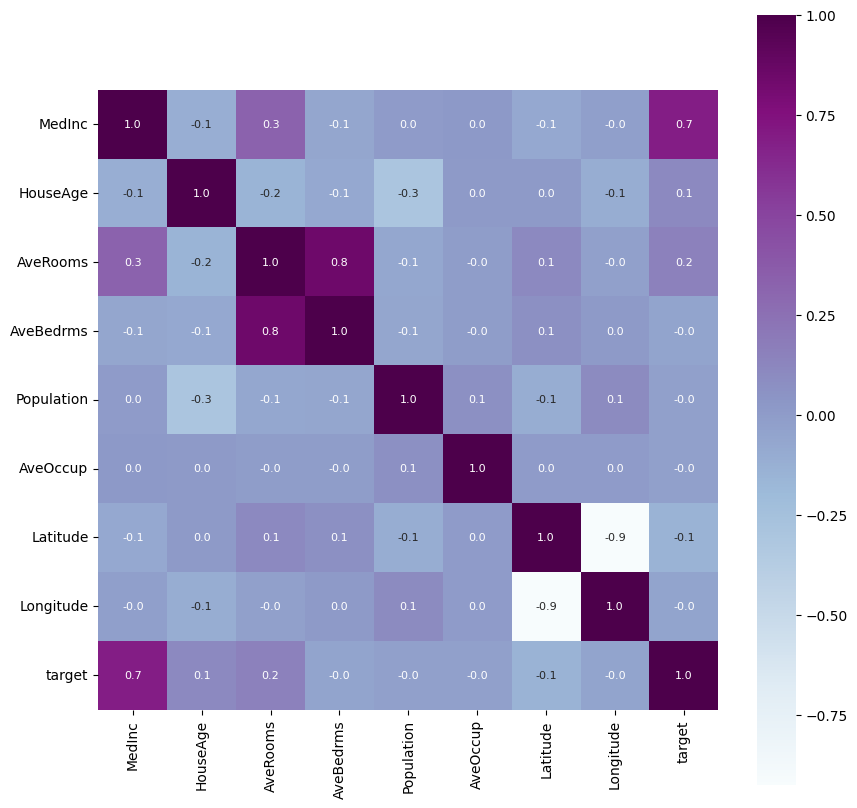

In [51]:
plt.figure(figsize= (10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot= True, annot_kws ={"size":8}, cmap="BuPu")

In [59]:
x= hpd.drop(["target"], axis=1)
y= hpd["target"]
print(x)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

In [60]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)


(20640, 8) (16512, 8) (4128, 8)
(20640,) (16512,) (4128,)


In [61]:
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
train_predict=model.predict(x_train)
print(train_predict)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [64]:
score_1=metrics.r2_score(y_train, train_predict)
print(score_1)

0.943650140819218


In [66]:
score_2=metrics.mean_absolute_error(y_train,train_predict)
print(score_2)

0.1933648700612105


In [67]:
score_3=metrics.mean_squared_error(y_train, train_predict)
print(score_3)

0.0748112971690747


In [69]:
model.fit(x_test,y_test)
test_predict=model.predict(x_test)
print(test_predict)

[2.8527207  1.985583   0.9782482  ... 1.5893257  0.79663825 2.2764437 ]


In [70]:
score_1=metrics.r2_score(y_test, test_predict)
print(score_1)

0.9861852514108522


In [71]:
score_3=metrics.mean_squared_error(y_test, test_predict)
print(score_3)

0.018608803303175693


In [72]:
score_3=metrics.mean_squared_error(y_test, test_predict)
print(score_3)

0.018608803303175693


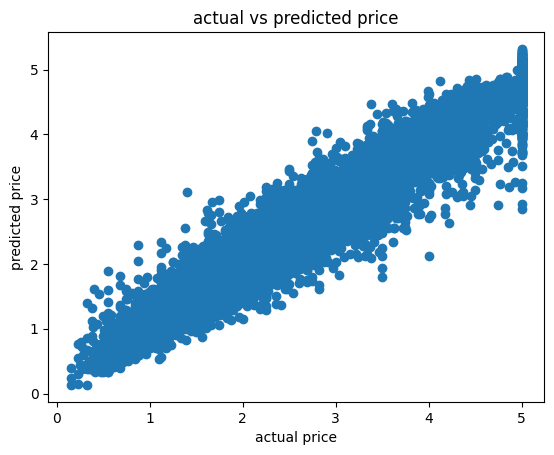

In [73]:
plt.scatter(y_train, train_predict)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted price")
plt.show()